In [1]:
#VISCOUS FLUID-----------------SPHERICAL PARTICLE----------- VARIABLE TIME STEP-----------------

import numpy as np
from math import *
from random import *
import matplotlib.pyplot as plt


#--------- PARAMETERS-------------------------------.
T=300.0                                   #TEMPERATURE in unit kelvin
eta=1e-3
a=2e-6                          #DIAMETER of the probe sphere in meter

dt_min=1e-2                                      #time step in unit second
dt_max=1e4
tf=1e7                             #total time in unit second

kb=1.38e-23                      #boltzman constant s.i unit

#some constants determined from the above parameters

D=(kb*T)/(6*pi*eta*(a/2))                  #diffusion coefficient of liquid
m=0.0                                     #mean of the random walk motion

#POSITION OF PARTICLE--------------------------
x=0.0                                     #initial x cordinate in unit micro meter
y=0.0                                     #initial y cordinate in unit micro meter
x_arr=[]                                #list of total x after ith step
y_arr=[]                                #list of total y after ith step


t=0.0
t_arr=[]                               #delta time array in seconds
dt_arr=[]
t = 0
while t < tf:
    #--------------------maxwell part of the code
    p=uniform(-2,4)
    dt=(10**p)                            #linear distributed in 10 base logscale of time
    s=((2*D*dt)**(0.5))                   #standard deviation of the random walk in  meter
    
    x=x+(gauss(m,s))
    x_arr.append(x)
    
    y=y+(gauss(m,s))
    y_arr.append(y)
    

    t=t+dt
    t_arr.append(t)
    dt_arr.append(dt)
    
x_arr=np.array(x_arr)
y_arr=np.array(y_arr)
    

In [2]:
len(x_arr)

13922

In [3]:
import pandas as pd
df_dt = pd.DataFrame(dt_arr)
df_dt

,0
0,0.196903
1,3348.674415
2,0.420600
3,4851.041937
4,0.136566
5,0.040631
6,12.362676
7,21.137835
8,398.128274
9,71.206809


In [4]:
pd.DataFrame.describe(df_dt)

,0
count,13922.000000
mean,718.694993
std,1763.696657
min,0.010000
25%,0.327597
50%,9.598174
75%,286.000737
max,9989.498341


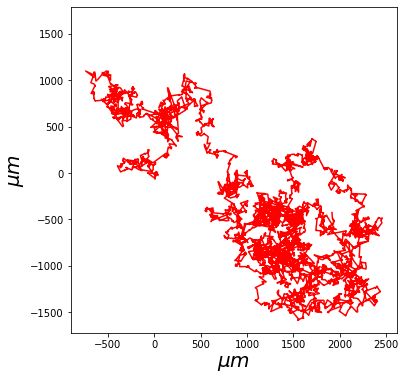

In [5]:
from pylab import rcParams
rcParams ['figure.figsize']=6,6


plt.plot(x_arr*1e6,y_arr*1e6,'red')

plt.ylabel(r'$\mu m$',size=20)
plt.xlabel(r'$\mu m$',size=20)
plt.axis('square')
plt.show()


<IPython.core.display.Javascript object>


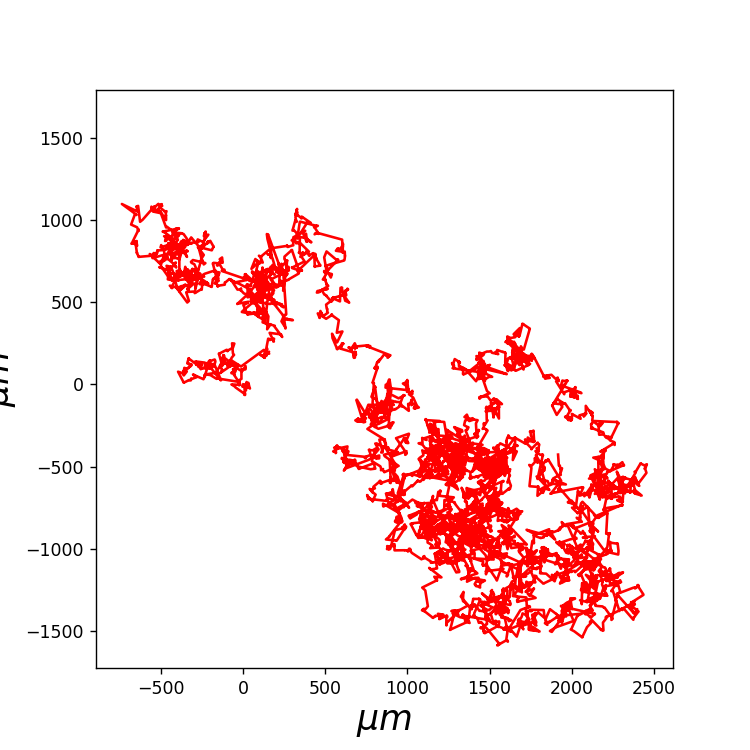

In [6]:
'''%matplotlib notebook
from pylab import rcParams
rcParams ['figure.figsize']=6,6


plt.plot(x_arr*1e6,y_arr*1e6,'red')

plt.ylabel(r'$\mu m$',size=20)
plt.xlabel(r'$\mu m$',size=20)
plt.axis('square')
plt.show()'''


In [8]:
np.savetxt('20.txt',x_arr)
np.savetxt('21.txt', y_arr)
np.savetxt('22.txt',t_arr)